In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from NLP_on_genres import transform_genres, is_there_nan_values

import warnings
warnings.filterwarnings("ignore")

## Preprocessing

### Loading data and applying NLP on genres

In [2]:
df = pd.read_csv('data/Spotify_exo2.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


## Data exploration

In [3]:
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [4]:
print(f"NaN values in Dataframe : {is_there_nan_values(df)}")

NaN values in Dataframe : False


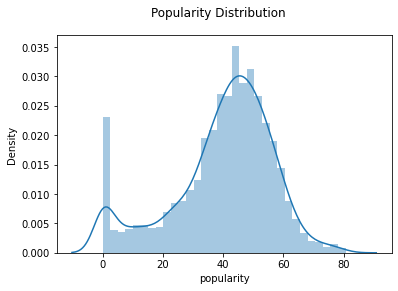

In [5]:
sns.distplot(df['popularity'])
plt.suptitle('Popularity Distribution')
plt.show()

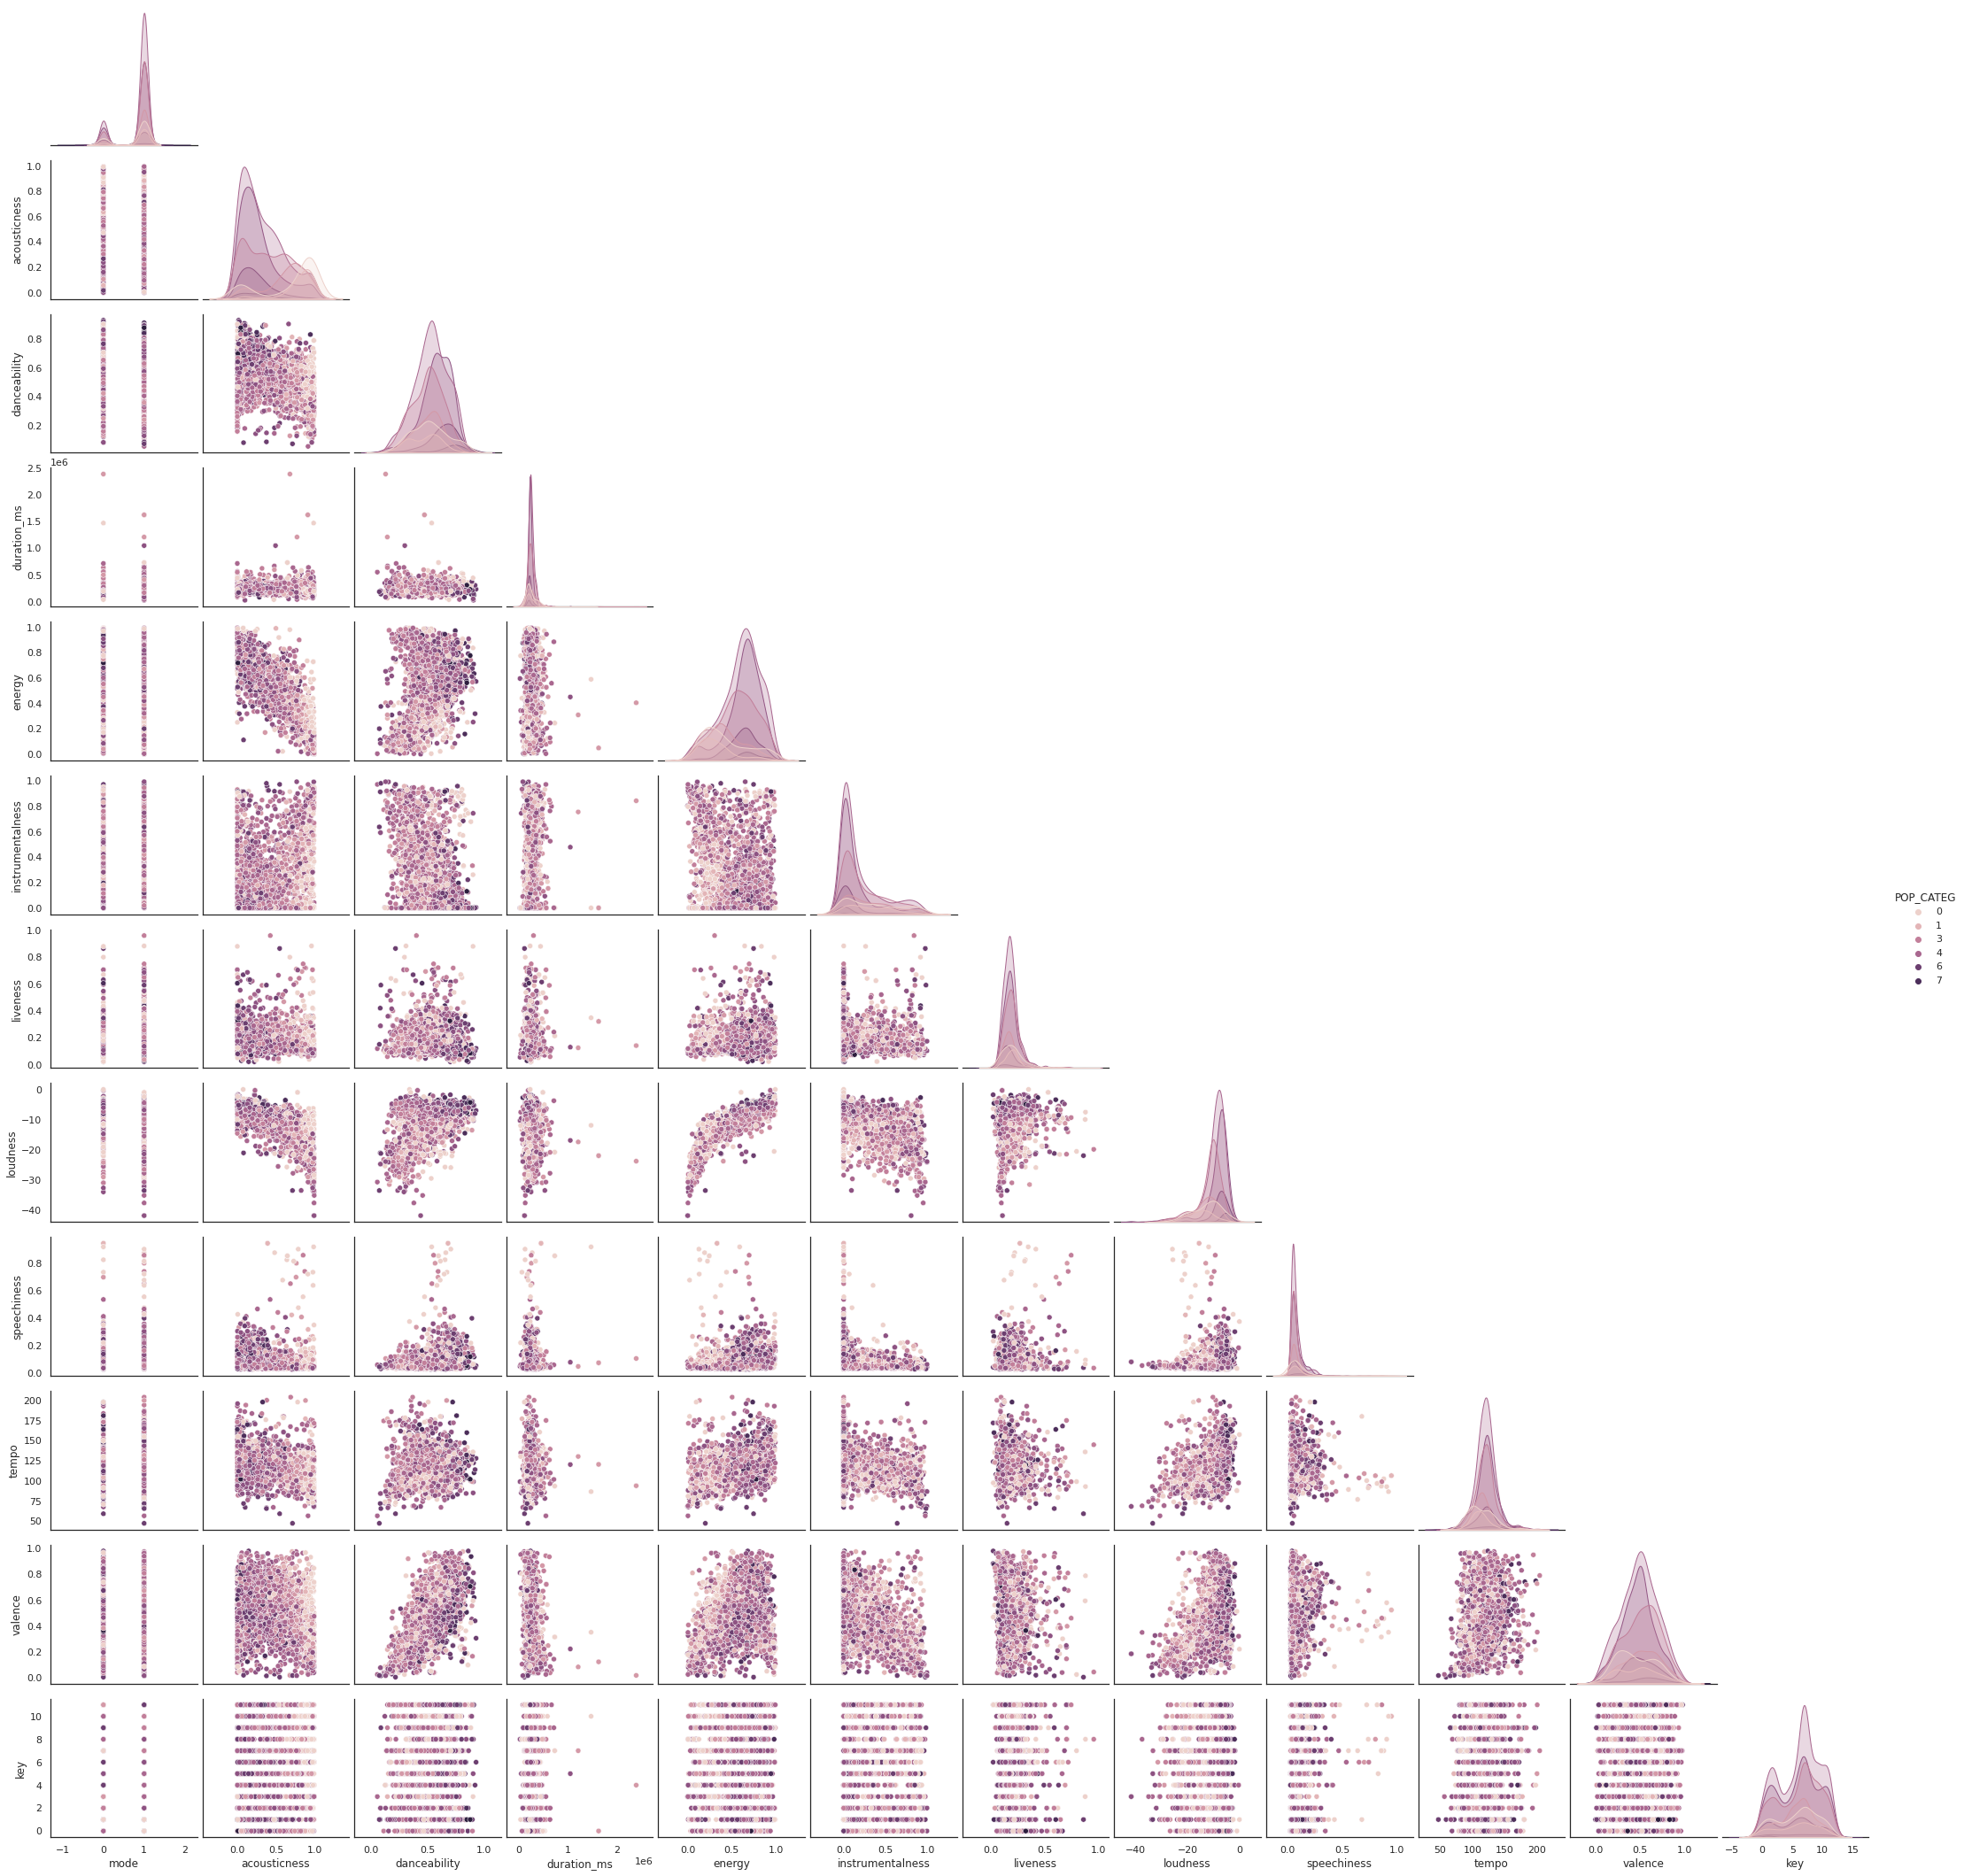

In [6]:
df_viz = df.drop(["genres"], axis=1)

pop = df_viz.popularity

pop_values_categories = list()

for e in pop:
    pop_values_categories.append(int(e/10))

new_column = pd.Series(pop_values_categories)

df_viz["POP_CATEG"] = new_column
df_viz = df_viz.drop("popularity", axis=1)

sns.set_theme(style="white")

sns_plot = sns.pairplot(df_viz, hue="POP_CATEG", corner=True)
# sns_plot.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

sns_plot.savefig("pairplot.png")

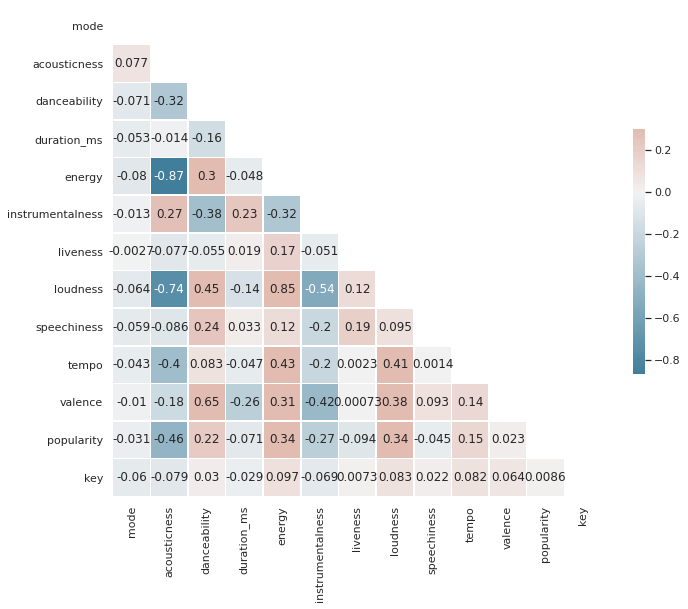

In [7]:
sns.set_theme(style="white")

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Exploring features

In [8]:
def compare_popularity_on_feature(feature, df1, df2):

    title1 = f'{feature} repartition for song popularity above {ceil}'
    title2 = f'{feature} repartition for song popularity bellow {floor}'

    figure, axes = plt.subplots(1, 2, figsize=(13, 5))

    sns.distplot(df1[feature], ax=axes[0])
    axes[0].set_title(title1)

    sns.distplot(df2[feature], ax=axes[1])
    axes[1].set_title(title2)
    plt.show()


ceil = 60
floor = 40

popular_above_ceil = df[df.popularity > ceil]
popular_below_floor = df[df.popularity < floor]

### 1) Acousticness

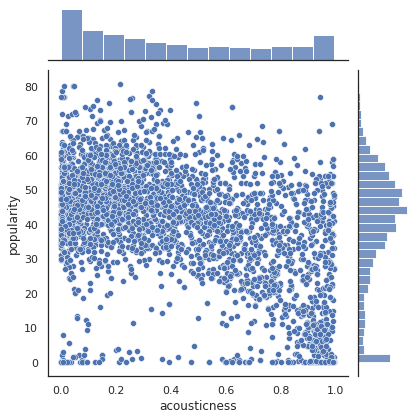

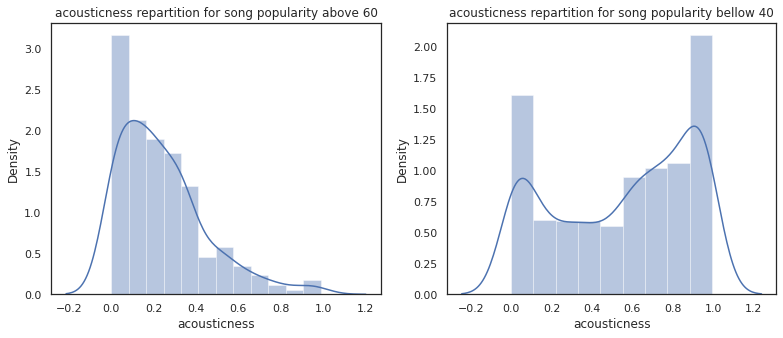

In [9]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('acousticness', popular_above_ceil, popular_below_floor)

### 2) Loudness

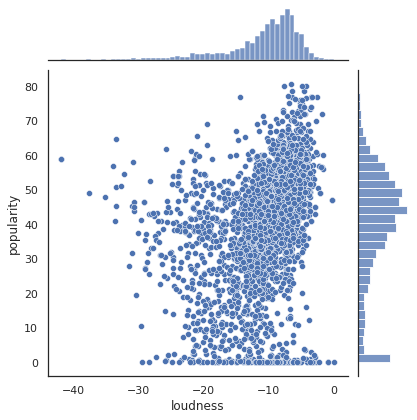

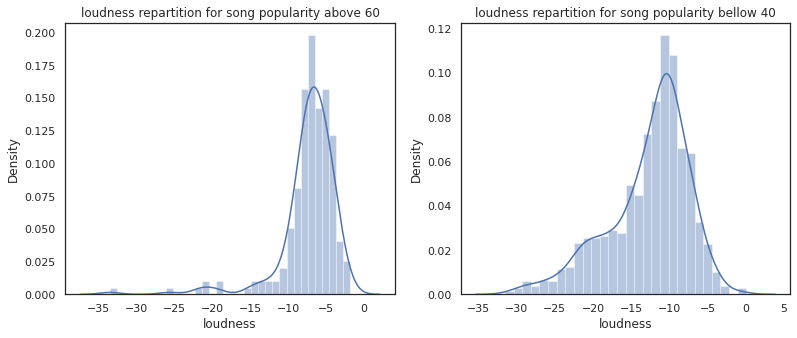

In [10]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('loudness', popular_above_ceil, popular_below_floor)

### 3) Energy

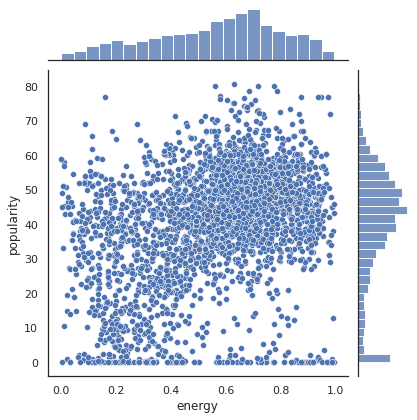

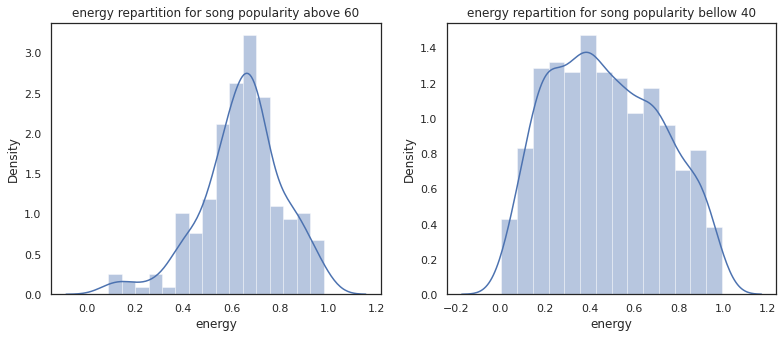

In [11]:
sns.jointplot(x = 'energy', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('energy', popular_above_ceil, popular_below_floor)

### 4) Instrumentalness

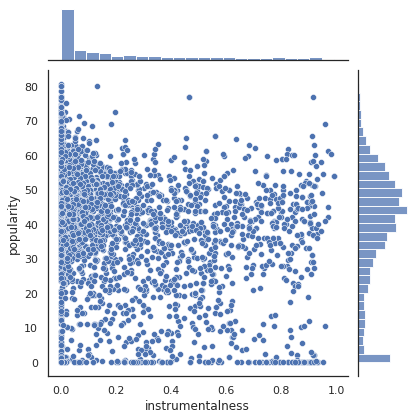

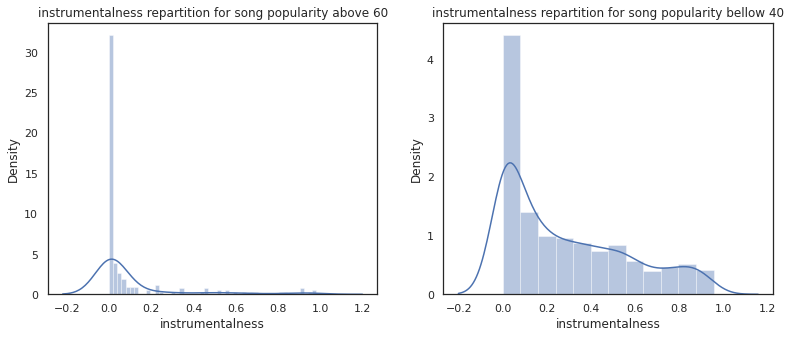

In [12]:
sns.jointplot(x = 'instrumentalness', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('instrumentalness', popular_above_ceil, popular_below_floor)

### 5) Liveness

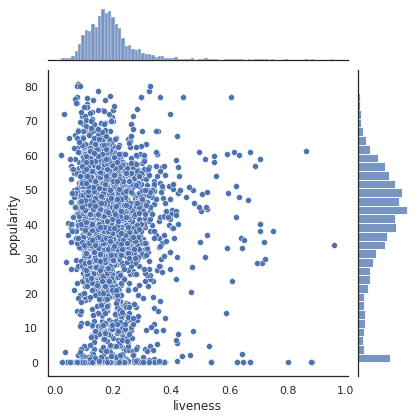

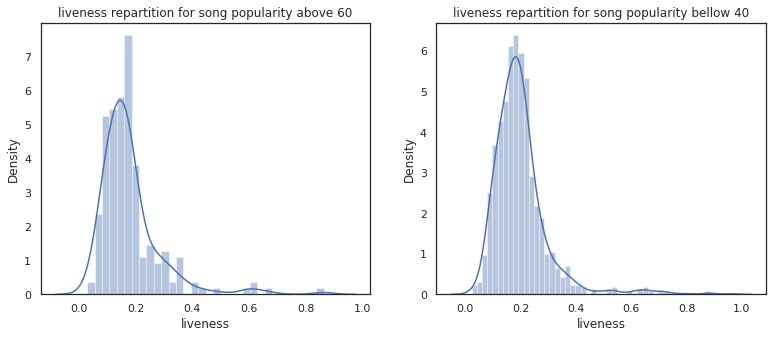

In [13]:
sns.jointplot(x = 'liveness', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('liveness', popular_above_ceil, popular_below_floor)

### 6) Tempo

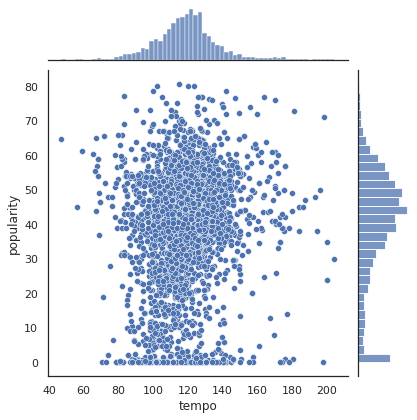

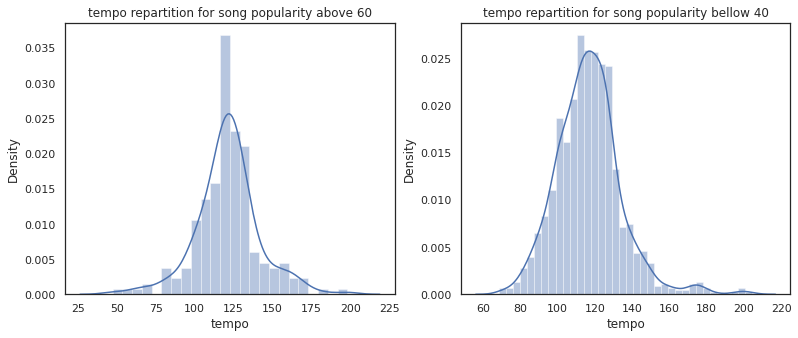

In [14]:
sns.jointplot(x = 'tempo', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('tempo', popular_above_ceil, popular_below_floor)

### 7) Danceability

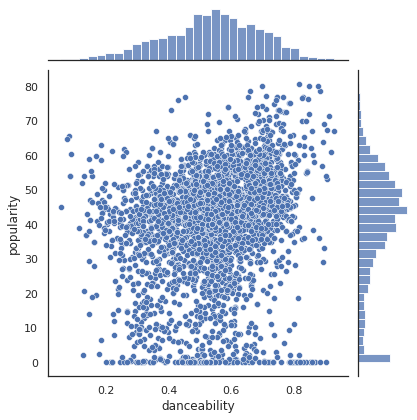

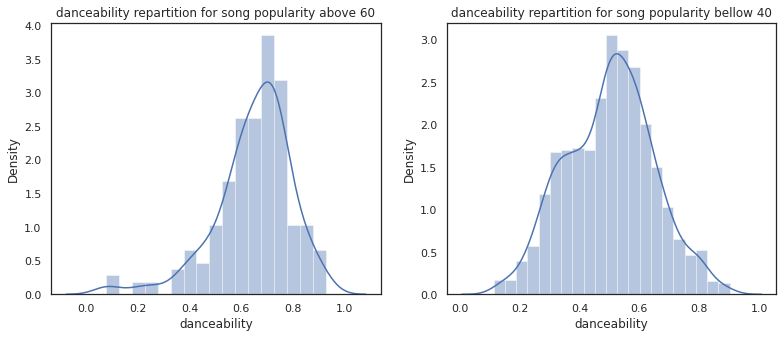

In [15]:
sns.jointplot(x = 'danceability', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('danceability', popular_above_ceil, popular_below_floor)

### 8) Duration

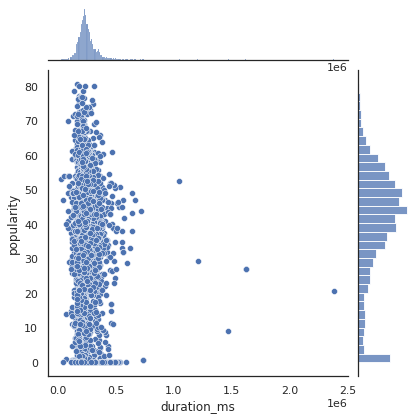

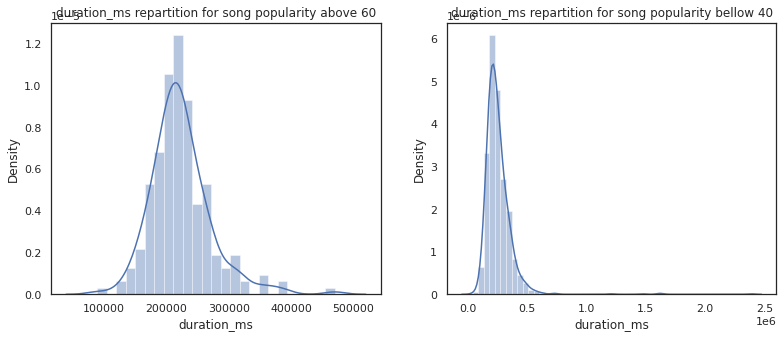

In [16]:
sns.jointplot(x = 'duration_ms', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('duration_ms', popular_above_ceil, popular_below_floor)

### 9) Valence

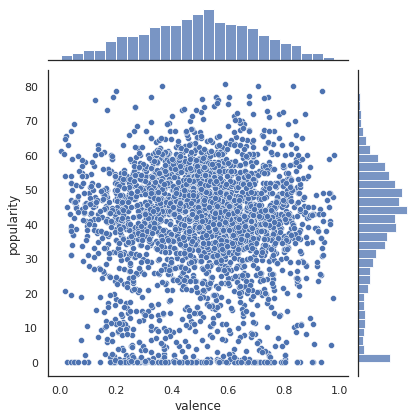

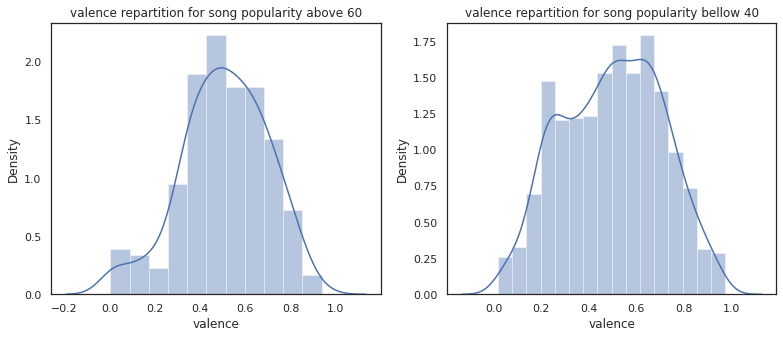

In [17]:
sns.jointplot(x = 'valence', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('valence', popular_above_ceil, popular_below_floor)

### 10) Speechiness

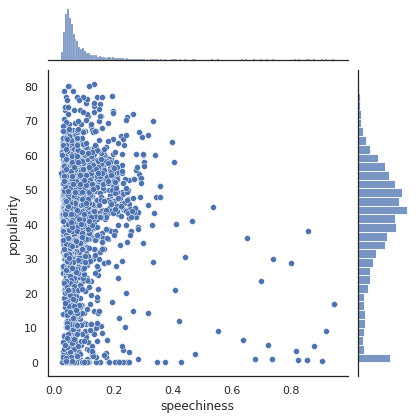

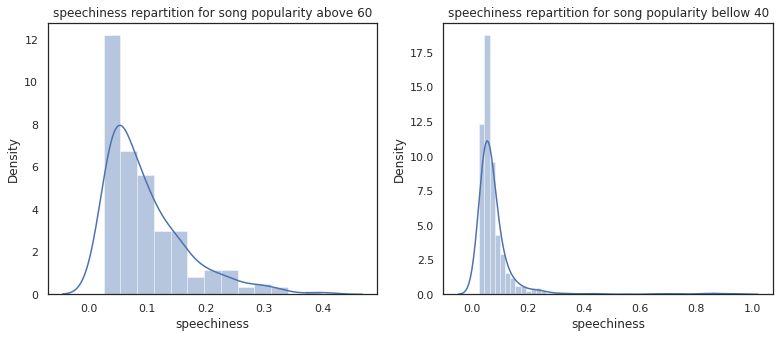

In [18]:
sns.jointplot(x = 'speechiness', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('speechiness', popular_above_ceil, popular_below_floor)

### 11) Key

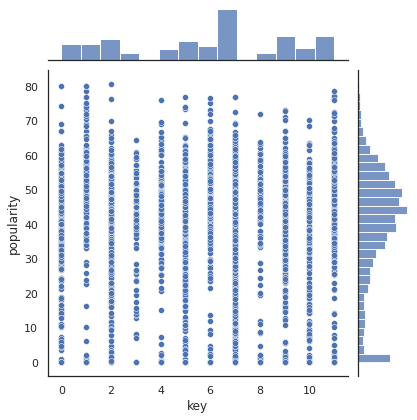

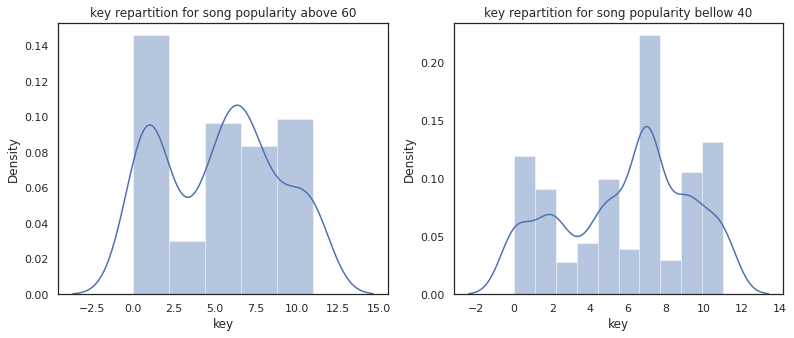

In [19]:
sns.jointplot(x = 'key', y = 'popularity', data = df)
plt.show()
compare_popularity_on_feature('key', popular_above_ceil, popular_below_floor)

### 12) Mode

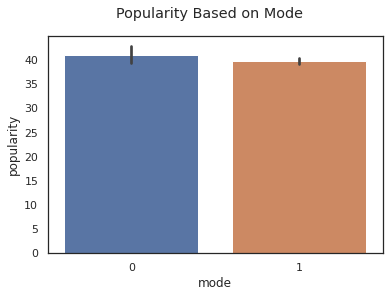

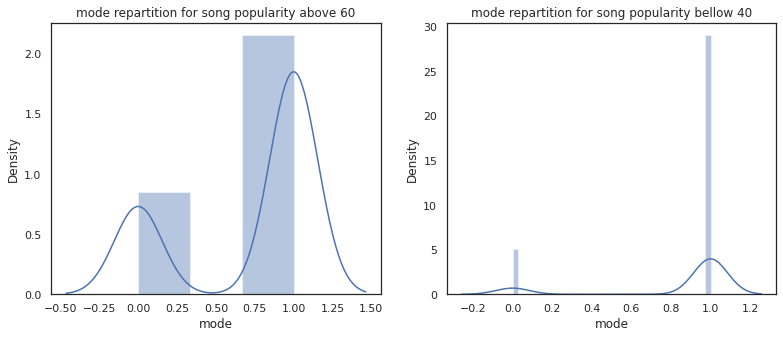

In [20]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.suptitle('Popularity Based on Mode')
plt.show()

compare_popularity_on_feature('mode', popular_above_ceil, popular_below_floor)

### BONUS : Popularity Based on Mode and Key

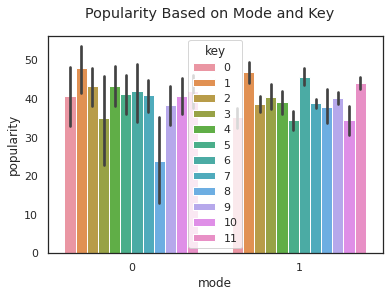

In [21]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.suptitle('Popularity Based on Mode and Key')
plt.show()

# Data vizualization

In [22]:
from sklearn.manifold import TSNE

def plot_TSNE(data, labels, save=False, name_of_file='output.png'):
    fig, ax1 = plt.subplots(1, 1, figsize=(10,10))

    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    legend_display = list()

    for i, row in enumerate(data):
        if labels[i] == 0:
            color="pink"
        elif labels[i] == 1:
            color='violet'
        elif labels[i] == 2:
            color='magenta'
        elif labels[i] == 3:
            color='darkviolet'
        elif labels[i] == 4:
            color='slateblue'
        elif labels[i] == 5:
            color='blue'
        elif labels[i] == 6:
            color='darkblue'
        elif labels[i] == 7:
            color='navy'
        else:
            color='black'

        if labels[i] not in legend_display:
            ax1.scatter(row[0], row[1], c=color, label=labels[i])
            legend_display.append(labels[i])
        else:
            ax1.scatter(row[0], row[1], c=color)

    plt.legend(loc='best')
    if save:
        plt.savefig(name_of_file)
    plt.show()

def convert_TSNE_and_plot(df_to_plot, save=False, name_of_file='output.png'):
    popularity_column = df_to_plot['popularity']

    popularity_categories= list()

    for e in popularity_column:
        popularity_categories.append(int(e/10))

    y = pd.Series(popularity_categories)

    df_to_plot = df_to_plot.drop("popularity", axis=1)

    X_embedded = TSNE(n_components=2).fit_transform(df_to_plot)

    plot_TSNE(X_embedded, y, save=save, name_of_file=name_of_file)

## TNSE without genres

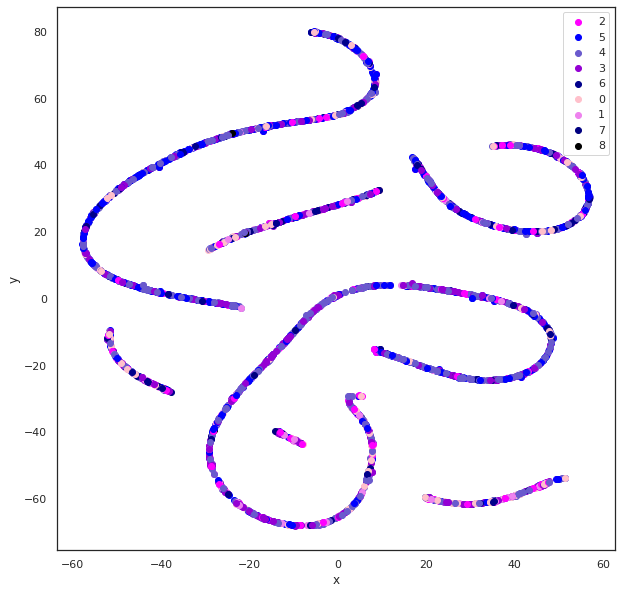

In [23]:
df_TSNE = df.drop(["genres"], axis=1)
convert_TSNE_and_plot(df_TSNE, False)

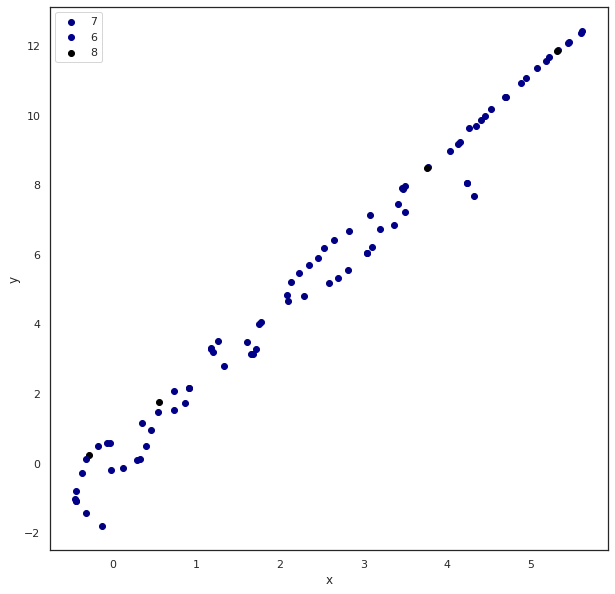

In [24]:
convert_TSNE_and_plot(df_TSNE[df_TSNE["popularity"] > 65], False)

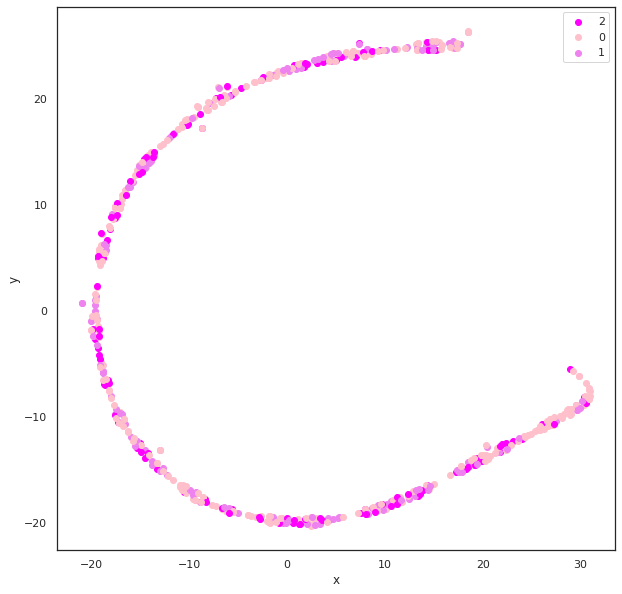

In [25]:
convert_TSNE_and_plot(df_TSNE[df_TSNE["popularity"] < 25], False)

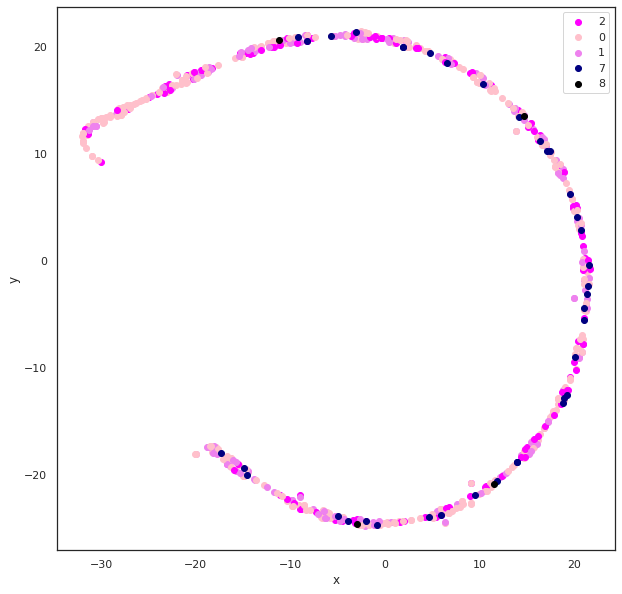

In [26]:
below_20 = df_TSNE[df_TSNE["popularity"] < 25]
over_70 = df_TSNE[df_TSNE["popularity"] > 70]

merged = pd.concat([below_20, over_70])
convert_TSNE_and_plot(merged, False)

## TNSE with genres columns

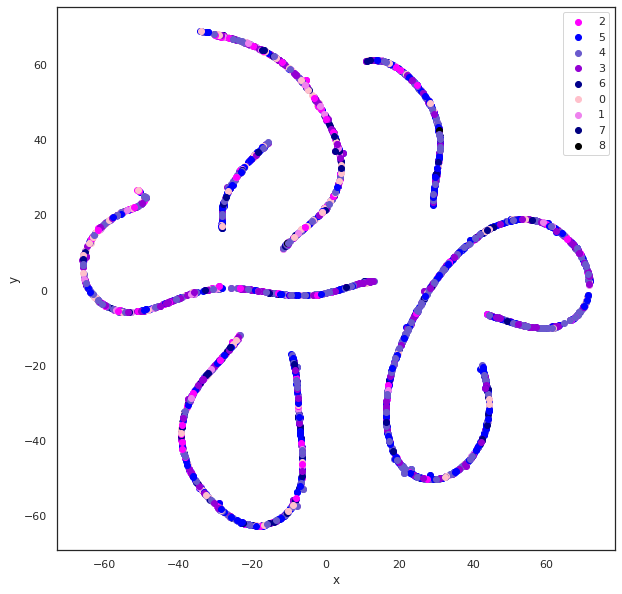

In [27]:
new_df_NLP = transform_genres(df)
new_df_NLP = new_df_NLP.drop('genres', axis=1)

convert_TSNE_and_plot(new_df_NLP, False)

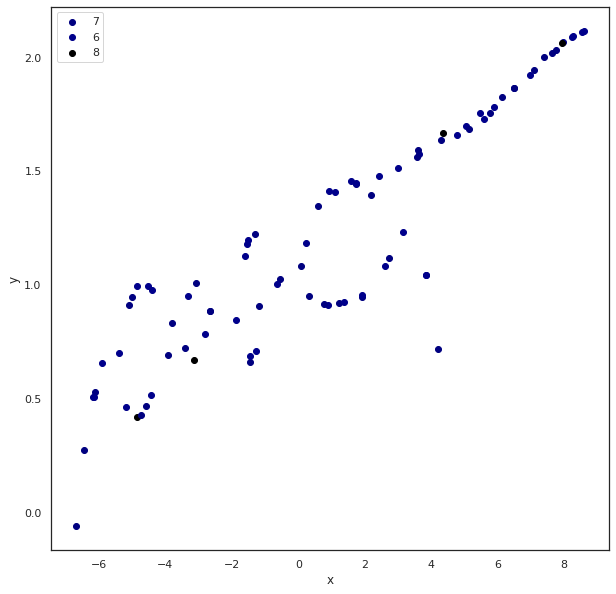

In [28]:
convert_TSNE_and_plot(new_df_NLP[new_df_NLP["popularity"] > 65], False)

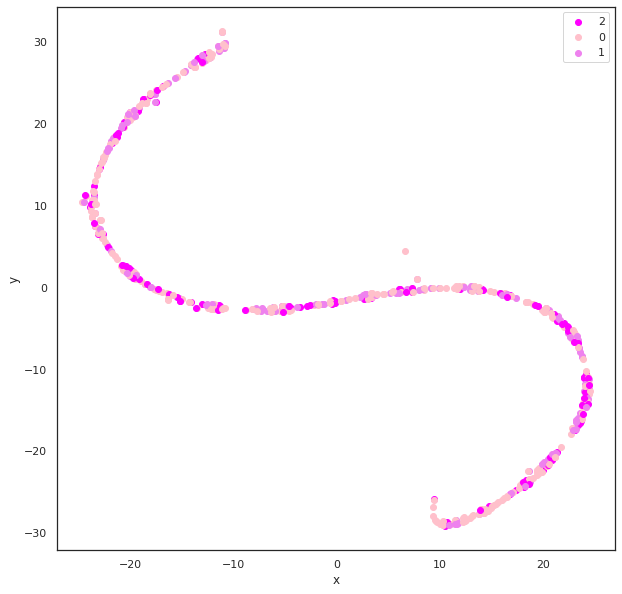

In [29]:
convert_TSNE_and_plot(new_df_NLP[new_df_NLP["popularity"] < 25], False)

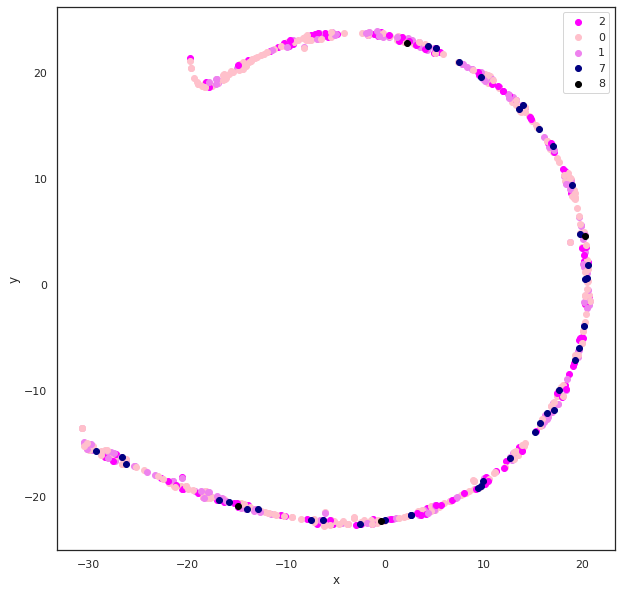

In [30]:
below_20 = new_df_NLP[new_df_NLP["popularity"] < 25]
over_70 = new_df_NLP[new_df_NLP["popularity"] > 70]

merged = pd.concat([below_20, over_70])
convert_TSNE_and_plot(merged, False)
